In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-10,10,0.1) # 200개 데이터 생성 (-10~10 범위에서 0.1씩 증가)
y = np.array([3*e + 7 + np.random.normal(0,6) for e in x])

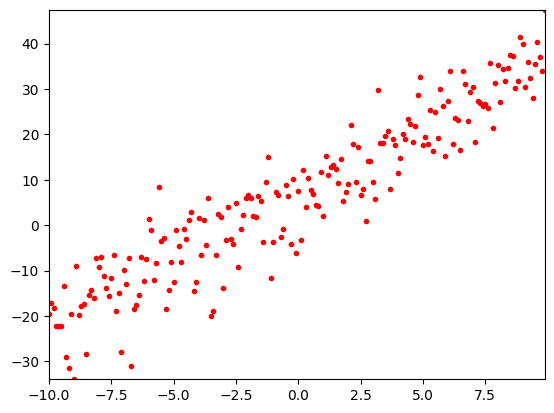

In [3]:
plt.figure()
plt.plot(x,y, 'r.')
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())
plt.show()

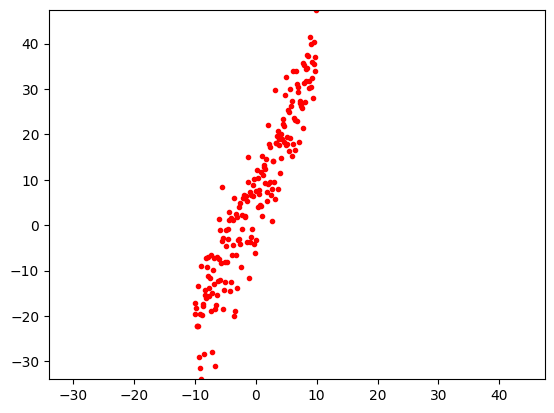

In [4]:
plt.figure()
plt.plot(x,y, 'r.')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.show()

In [5]:
import GradientDescent

In [6]:
b = 7
w = 2
wl = np.arange(-10,10,0.1)
pr = np.array([w * e + b for e in x])
GradientDescent.mse(y,pr)

67.2893602579531

In [7]:
wl = np.arange(-10,10,0.1)
pl = np.array([[w * e + b for e in x] for w in wl])
mses = np.array([GradientDescent.mse(y,p) for p in pl])

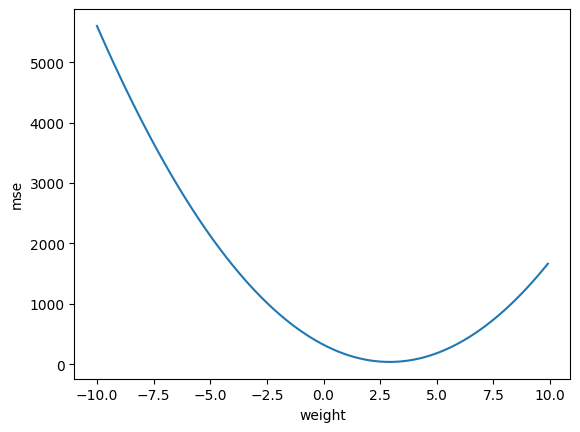

In [8]:
plt.plot(wl, mses)
plt.xlabel('weight')
plt.ylabel('mse')
plt.show()

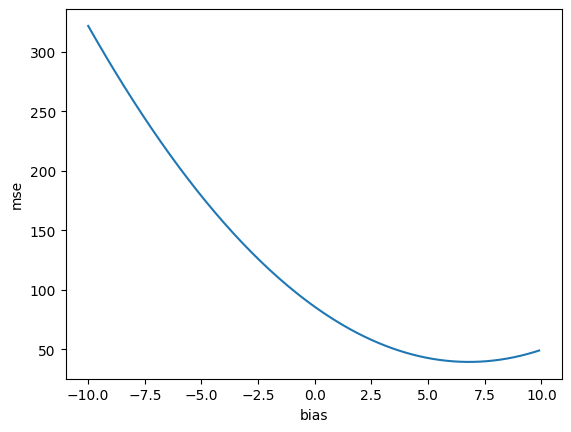

In [9]:
w = 3 # 가중치 지정
bl = np.arange(-10,10,0.1)
pl = np.array([[w *e + b for e in x] for b in bl])
mses =np.array([GradientDescent.mse(y,p) for p in pl])
plt.figure()
plt.plot(wl,mses)
plt.xlabel('bias')
plt.ylabel('mse')
plt.show()

## 코드 적용 전

In [10]:
GradientDescent.gradient(x,y,1,7) # 음수 → 값 변경(증가)

(-127.8204229699286, 0.5903061916248823, 161.77478322788193)

In [11]:
GradientDescent.gradient(x,y,2,7) # 음수 → 값 변경(증가)

(-61.15042296992906, 0.4903061916248065, 67.2893602579531)

In [12]:
GradientDescent.gradient(x,y,3,7) # 양수 → 값 변경(감소)

(5.519577030070472, 0.39030619162473795, 39.473937288023805)

In [13]:
GradientDescent.gradient(x,y,2.8,7) # 양수 → 값 변경(감소)

(-7.814422969929436, 0.41030619162475196, 39.7034218820097)

## 코드 적용 후

In [14]:
w, b, hist = GradientDescent.gradient_desent(x,y, 0.001)

In [15]:
hist

[[0, 0.864, -135.592, -5.779, -24.953, 335.3127632742335],
 [1, 1.0, -126.554, -5.754, -24.917, 316.9181376106428],
 [2, 1.126, -118.119, -5.729, -24.88, 300.81549093414134],
 [3, 1.245, -110.247, -5.704, -24.842, 286.7097133711507],
 [4, 1.355, -102.899, -5.679, -24.803, 274.3437320918789],
 [100, 2.899, -0.169, -3.499, -20.598, 145.2814670800843],
 [200, 2.904, -0.026, -1.63, -16.861, 110.28405924230316],
 [300, 2.906, -0.021, -0.101, -13.802, 86.83335680295205],
 [400, 2.908, -0.017, 1.151, -11.298, 71.11968886046373],
 [500, 2.91, -0.014, 2.176, -9.248, 60.5903940196429],
 [600, 2.911, -0.012, 3.015, -7.571, 53.53500439000946],
 [700, 2.912, -0.01, 3.702, -6.197, 48.80738268518704],
 [800, 2.913, -0.008, 4.264, -5.073, 45.639533968507536],
 [900, 2.914, -0.006, 4.724, -4.152, 43.516846046686],
 [1000, 2.914, -0.005, 5.101, -3.399, 42.09449150376767],
 [1100, 2.915, -0.004, 5.409, -2.782, 41.14141101324302],
 [1200, 2.915, -0.004, 5.662, -2.278, 40.50277810280501],
 [1300, 2.915, -0

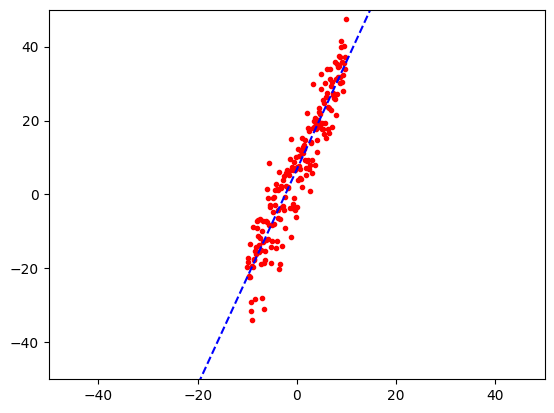

In [18]:
plt.figure()
plt.plot(x,y,'r.')
plt.plot((-50,50), [-50*w+b, 50*w+b], 'b--')
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.show()

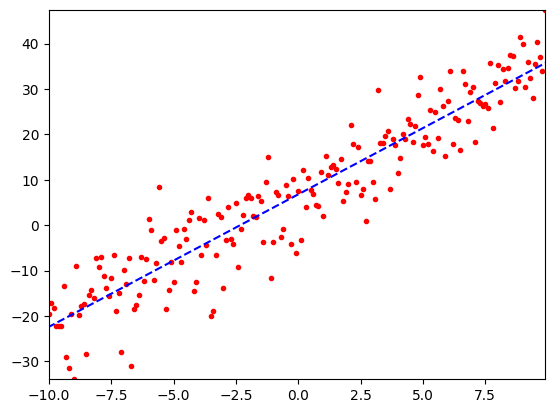

In [17]:
plt.figure()
plt.plot(x,y,'r.')
plt.plot((-50,50), [-50*w+b, 50*w+b], 'b--')
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())
plt.show()

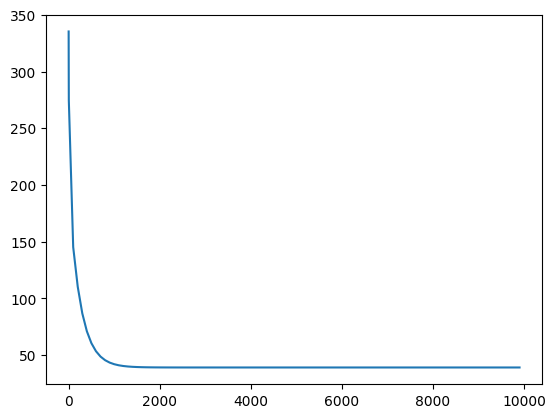

In [20]:
xi = [i for i,_,_,_,_,_ in hist]
rl = [r for _,_,_,_,_,r in hist]
plt.plot(xi,rl)
plt.show()

## LinearRegression
### 보스턴 주택 가격 회귀 구현

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import seaborn as sns

In [17]:
df = pd.read_csv('boston_house.csv')
df

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


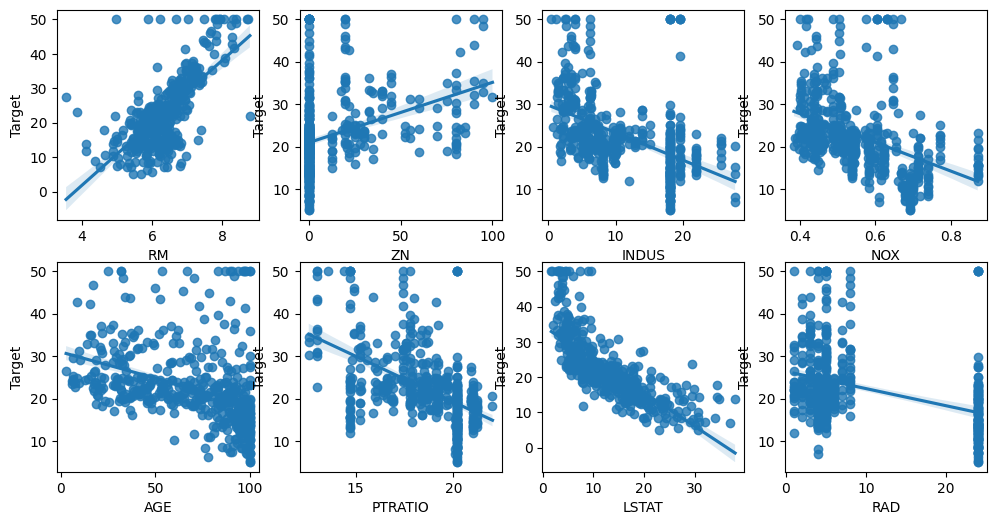

In [19]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(12,6))
features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='Target', data=df, ax=axs[row][col])
    
plt.show()

In [20]:
data = df.drop('Target', axis=1)
label = df['Target']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data, label)

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
model.score(x_test, y_test) # == r2score

0.7750636891666758

In [24]:
r2_score(y_test, pred)

0.7750636891666758

In [26]:
# 라이브러리 함수
mean_squared_error(y_test, pred)

18.675694435754522

In [27]:
# 제작 함수 검증
GradientDescent.mse(y_test, pred)

18.67569443575452

In [29]:
np.sqrt(GradientDescent.mse(y_test, pred)) # root 

4.3215384339092155

In [30]:
model.intercept_

41.45440995547404

In [32]:
model.coef_ # model weight

array([ 2.32935519e-02,  8.65937144e-03,  3.35988382e+00, -9.87524849e-02,
       -1.48632838e+00,  2.51238003e-02, -5.70036179e-01, -2.15119634e+01,
       -9.80966923e-01,  3.41018082e-01,  4.49084059e-02, -1.40433707e-02,
        3.13150730e+00])

In [33]:
x0  = data.iloc[0]
s = 0
for i in range(len(x0)):
    s += x0[i] * model.coef_[i]
s += model.intercept_

print(s)

30.051140204136725
